In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aapl-stock-data-hourly/AAPL Hourly with Technical Indicators.csv
/kaggle/input/aapl-stock-data-hourly/AAPL Hourly.csv


# **AAPL STOCK HOURLY DATA**

In [2]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-hourly/AAPL Hourly.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['open', 'high', 'low', 'volume']].values
y = data['close'].values  # Assuming you want to predict the 'Close' price

In [3]:
# Normalize the data (important for neural networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [4]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size =256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

Epoch 1/10
21/21 [==============================] - 4s 52ms/step - loss: 0.1166
Epoch 2/10
21/21 [==============================] - 1s 52ms/step - loss: 0.0139
Epoch 3/10
21/21 [==============================] - 1s 44ms/step - loss: 0.0072
Epoch 4/10
21/21 [==============================] - 1s 48ms/step - loss: 0.0053
Epoch 5/10
21/21 [==============================] - 1s 46ms/step - loss: 0.0047
Epoch 6/10
21/21 [==============================] - 1s 44ms/step - loss: 0.0043
Epoch 7/10
21/21 [==============================] - 1s 55ms/step - loss: 0.0043
Epoch 8/10
21/21 [==============================] - 1s 55ms/step - loss: 0.0043
Epoch 9/10
21/21 [==============================] - 1s 51ms/step - loss: 0.0039
Epoch 10/10
83/83 [==============================] - 1s 5ms/step - loss: 0.0014
Test Loss: 0.001378023182041943
83/83 [==============================] - 1s 5ms/step


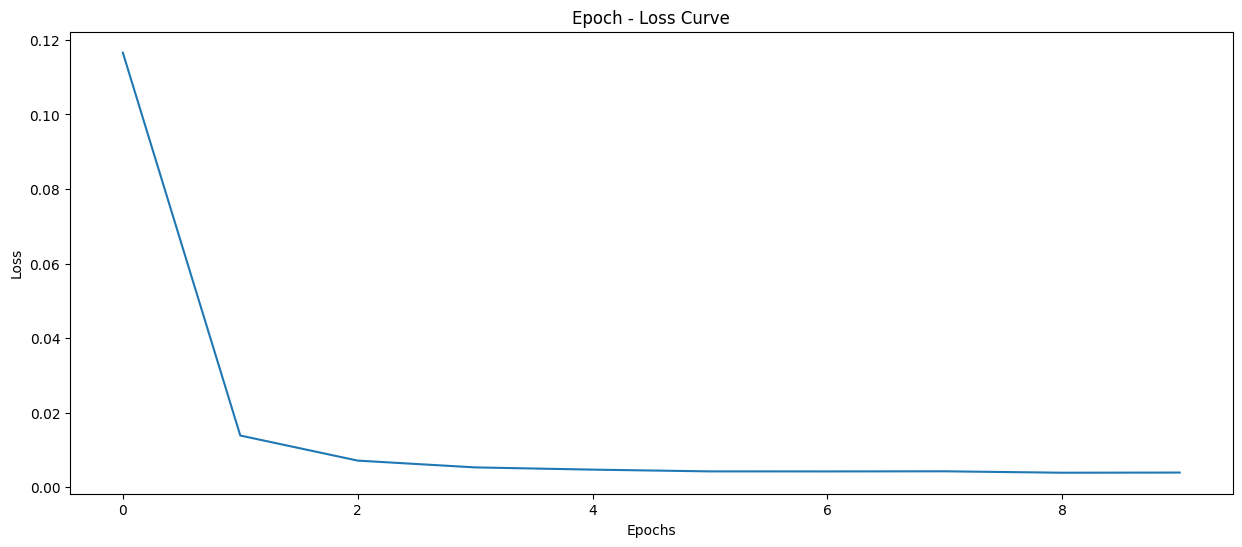

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [8]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2.3149479323331303
Mean Squared Error (MSE): 7.20767587894076
Root Mean Squared Error (RMSE): 2.6847115075815426


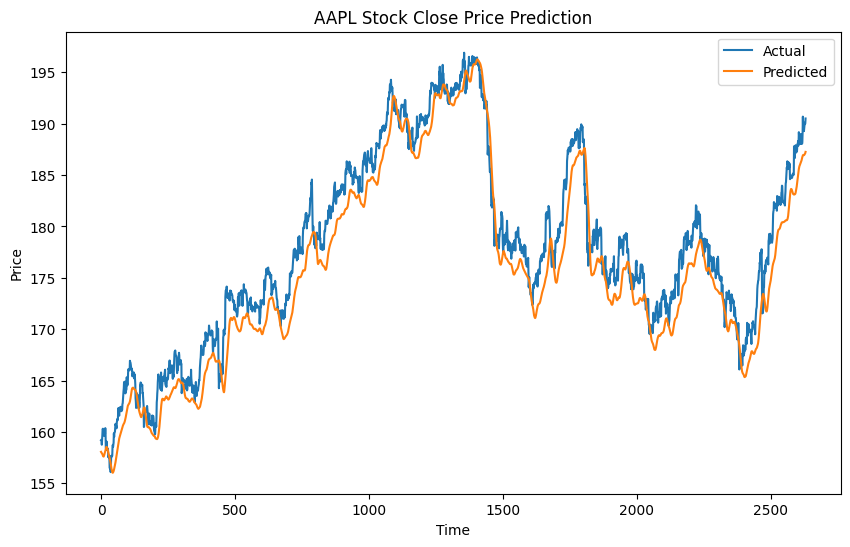

In [9]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **HOURLY DATA WITHOUT TECHNICAL INDICATORS LOG STANDARDIZATION**

In [10]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-hourly/AAPL Hourly.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['open', 'high', 'low', 'volume']].values
y = data['close'].values  # Assuming you want to predict the 'Close' price

In [11]:
# Normalize the data (important for neural networks)
scaler_X = MinMaxScaler()
X=np.log(X)
y=np.log(y.reshape(-1,1))

In [12]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size =256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

Epoch 1/10
21/21 [==============================] - 4s 50ms/step - loss: 4.7885
Epoch 2/10
21/21 [==============================] - 1s 57ms/step - loss: 1.2589
Epoch 3/10
21/21 [==============================] - 1s 49ms/step - loss: 0.7569
Epoch 4/10
21/21 [==============================] - 1s 52ms/step - loss: 0.5779
Epoch 5/10
21/21 [==============================] - 1s 48ms/step - loss: 0.4933
Epoch 6/10
21/21 [==============================] - 1s 44ms/step - loss: 0.4506
Epoch 7/10
21/21 [==============================] - 1s 48ms/step - loss: 0.4302
Epoch 8/10
21/21 [==============================] - 1s 47ms/step - loss: 0.4045
Epoch 9/10
21/21 [==============================] - 1s 43ms/step - loss: 0.4004
Epoch 10/10
83/83 [==============================] - 1s 5ms/step - loss: 0.7183
Test Loss: 0.7183496952056885
83/83 [==============================] - 1s 4ms/step


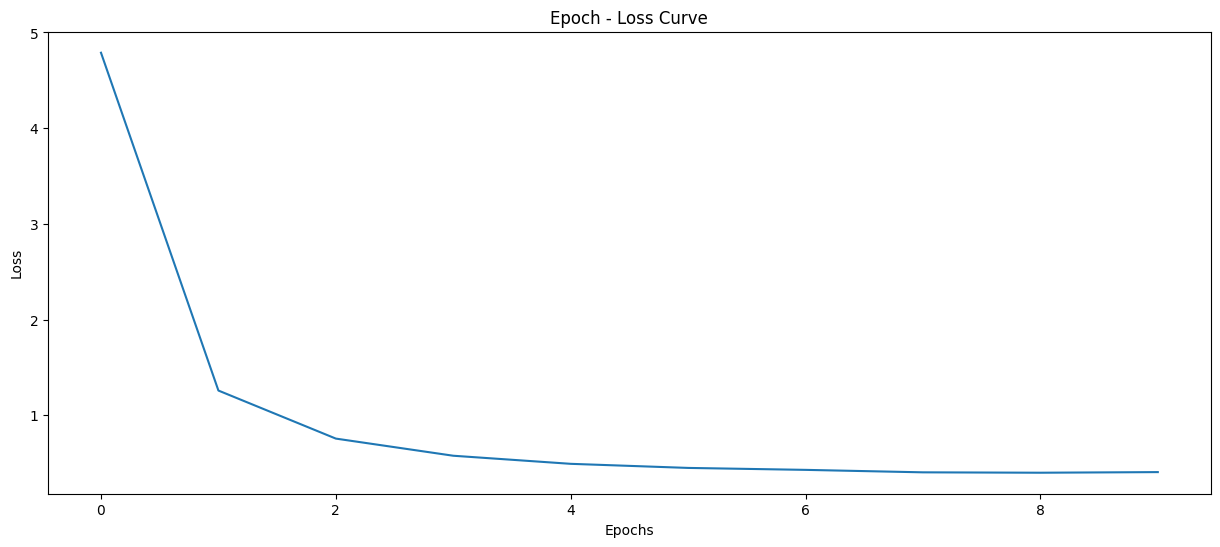

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 101.59071511779088
Mean Squared Error (MSE): 10363.021547904595
Root Mean Squared Error (RMSE): 101.79892704692223


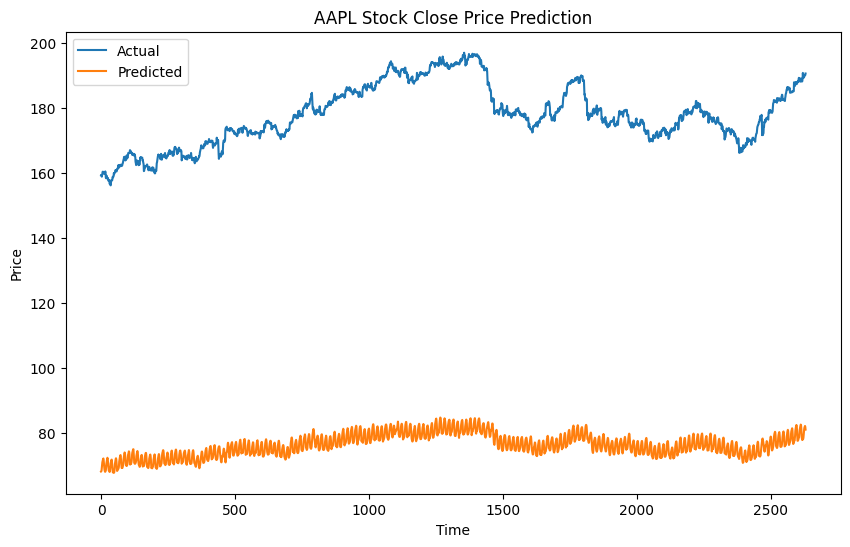

In [17]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **AAPL STOCK HOURLY DATA WITH TECHNICAL INDICATORS**

In [18]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-hourly/AAPL Hourly with Technical Indicators.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['open', 'high', 'low', 'volume', 'vwap', 'transactions', '%K', 'RSI', 'MACD', '%R', 'PROC']].values
y = data['close'].values  # Assuming you want to predict the 'Close' price

In [19]:
# Normalize the data (important for neural networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [20]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size =256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

Epoch 1/10
21/21 [==============================] - 4s 48ms/step - loss: 0.0732
Epoch 2/10
21/21 [==============================] - 1s 50ms/step - loss: 0.0155
Epoch 3/10
21/21 [==============================] - 1s 54ms/step - loss: 0.0084
Epoch 4/10
21/21 [==============================] - 1s 55ms/step - loss: 0.0057
Epoch 5/10
21/21 [==============================] - 1s 50ms/step - loss: 0.0043
Epoch 6/10
21/21 [==============================] - 1s 49ms/step - loss: 0.0040
Epoch 7/10
21/21 [==============================] - 1s 48ms/step - loss: 0.0036
Epoch 8/10
21/21 [==============================] - 1s 48ms/step - loss: 0.0034
Epoch 9/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0033
Epoch 10/10
83/83 [==============================] - 1s 5ms/step - loss: 0.0028
Test Loss: 0.0028289910405874252
83/83 [==============================] - 1s 4ms/step


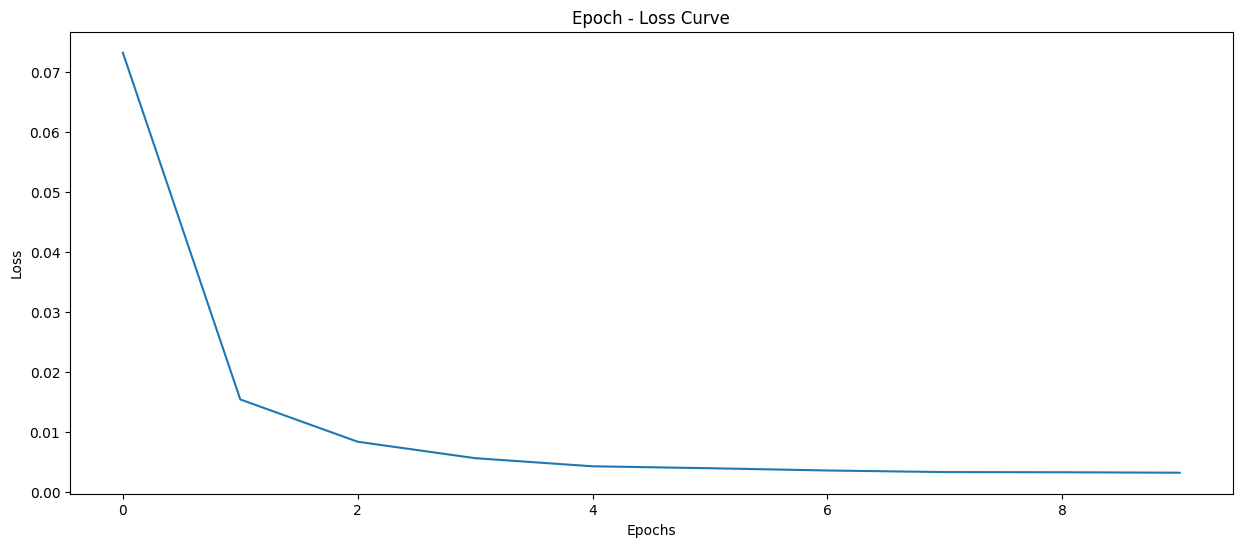

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 3.58553158063616
Mean Squared Error (MSE): 14.7968709708834
Root Mean Squared Error (RMSE): 3.8466701146424556


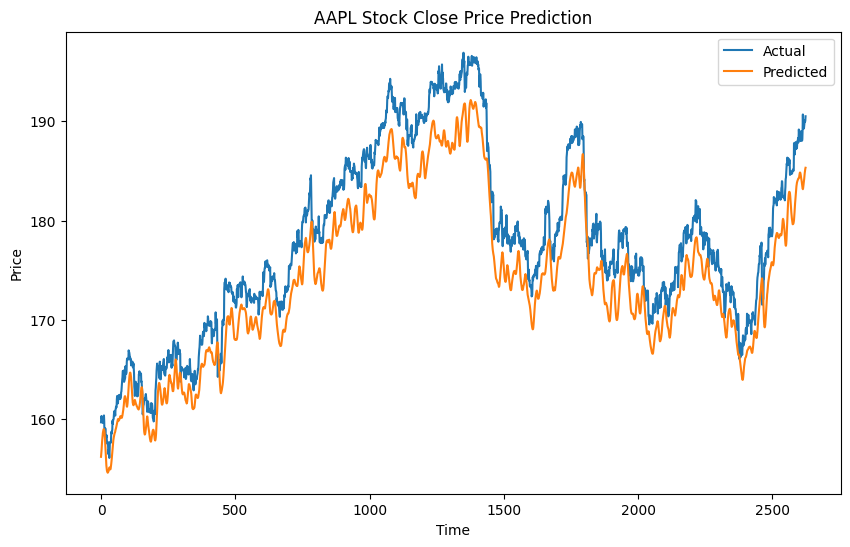

In [25]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()